In [1]:

from dense_image_aligment.transformations.reprojection import ReprojectionTransformation
from dense_image_aligment import read_as_grayscale
from dense_image_aligment import show_data

import numpy as np 
import matplotlib.pyplot as plt
import cv2 
from glob import glob 
import pandas as pd 
from pathlib import Path 

In [2]:
root_data = Path('./datasets/Multi-FoV/data')
info_intensity_images = pd.read_csv('./datasets/Multi-FoV/info/images.txt', names=['image_id', 'timestamp' , 'path_to_img'], sep=" ")
info_depth_images = pd.read_csv('./datasets/Multi-FoV/info/depthmaps.txt', names=['image_id', 'path_to_img'], sep=" ")

In [3]:
image_id = 196

intensity_fname = info_intensity_images[info_intensity_images['image_id'] == image_id]['path_to_img'].values[0]
image_intensity = read_as_grayscale(str(root_data / intensity_fname))

depth_fname = info_depth_images[info_depth_images['image_id'] == image_id]['path_to_img'].values[0]
image_depth = np.loadtxt(str(root_data / depth_fname)).reshape(image_intensity.shape[:2])

print(intensity_fname)
image_intensity.shape, image_depth.shape


img/img0196_0.png


((480, 640), (480, 640))

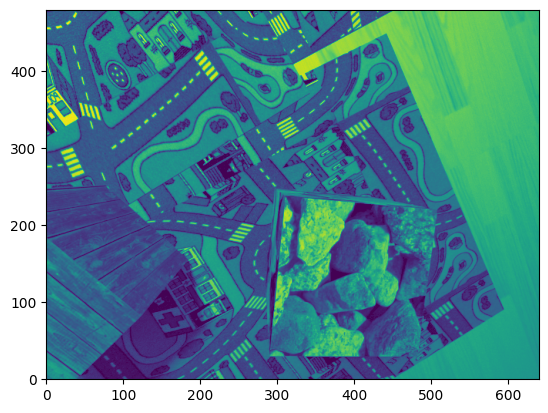

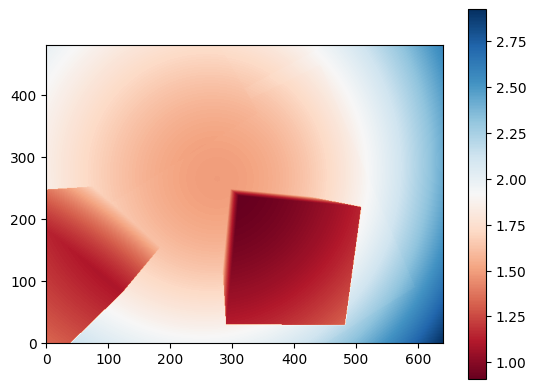

In [4]:
plt.imshow(image_intensity, origin='lower')
plt.show()

fig, (ax1) = plt.subplots(ncols=1)
image_show = ax1.imshow(image_depth, origin='lower', cmap='RdBu')
cbar = fig.colorbar(image_show, ax=ax1)
plt.show()

In [5]:
camera_params_path = './datasets/Multi-FoV/info/intrinsics copy.txt'
with open(camera_params_path) as f: 
    data = f.read() 
    data = data.split('=')[-1]
    
    K = np.array(eval(data))

In [6]:
K

array([[329.11552005,   0.        ,   0.        ],
       [  0.        , 329.11552005,   0.        ],
       [  0.        ,   0.        ,   1.        ]])

In [7]:
p_init = np.array(
    [0., np.pi/5, 0., -0.5, 0., 1.],
    dtype=np.float32
)

# p_init = np.array(
#     [0., 0., 0., 0., 0., 0.],
#     dtype=np.float32
# )
transform = ReprojectionTransformation(p_init=p_init, intrinsic=K.reshape(-1))

In [9]:
image_transformed, depth_image = transform.apply_transformation(
    (image_intensity, image_depth), 
    shape=image_intensity.shape[:2]
)

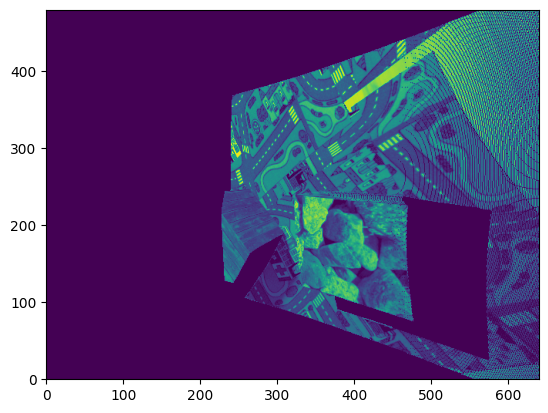

In [10]:
plt.imshow(image_transformed, origin='lower')
plt.show()

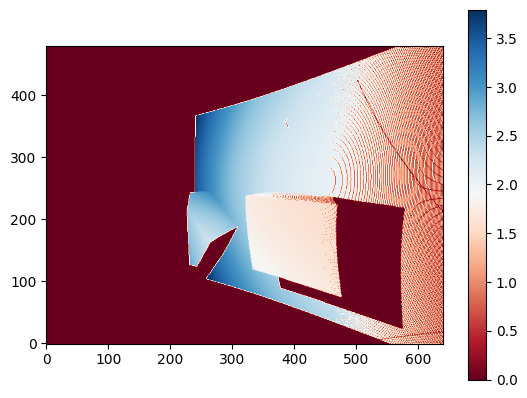

In [11]:
fig, (ax1) = plt.subplots(ncols=1)
image_show = ax1.imshow(depth_image, origin='lower', cmap='RdBu')
cbar = fig.colorbar(image_show, ax=ax1)
plt.show()

In [12]:
depth_image.min(), depth_image.max()

(0.0, 3.7900750870297966)

In [15]:
image_depth.min(), image_depth.max()

(0.908437, 2.92434)